In [18]:
print("Importing Libraries...\n")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

print("All libraries imported successfully!\n")

Importing Libraries...

All libraries imported successfully!



In [19]:
print("Loading Dataset...\n")

df = pd.read_csv("C:/Users/Ashok/Downloads/insurance.csv")

print("Dataset Loaded Successfully!\n")

print("First 5 Rows:")
print(df.head(), "\n")

print("Dataset Shape:", df.shape, "\n")

print("Dataset Info:")
print(df.info(), "\n")

print("Checking Missing Values:")
print(df.isnull().sum(), "\n")

Loading Dataset...

Dataset Loaded Successfully!

First 5 Rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

Dataset Shape: (1338, 7) 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage

In [20]:
print("Statistical Summary\n")

print(df.describe(), "\n")

print("Unique Values in Categorical Columns:\n")

print("Sex:", df['sex'].unique())
print("Smoker:", df['smoker'].unique())
print("Region:", df['region'].unique(), "\n")

Statistical Summary

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 

Unique Values in Categorical Columns:

Sex: ['female' 'male']
Smoker: ['yes' 'no']
Region: ['southwest' 'southeast' 'northwest' 'northeast'] 



Performing EDA...

Plotting Charges Distribution...


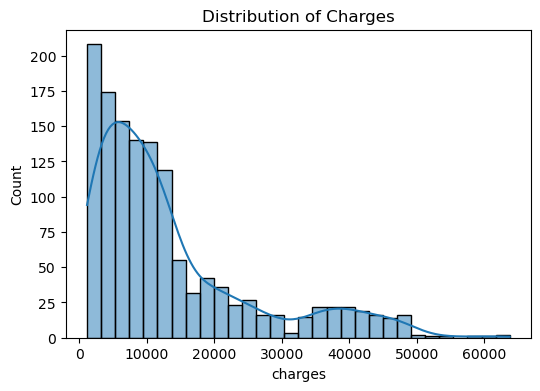

Plotting Correlation Heatmap...


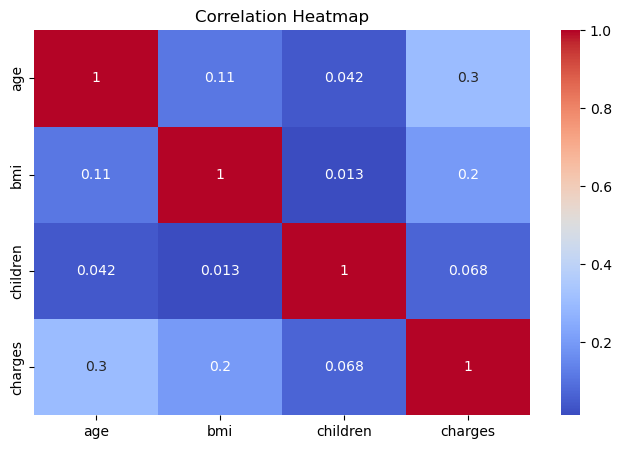

Plotting Smoker vs Charges...


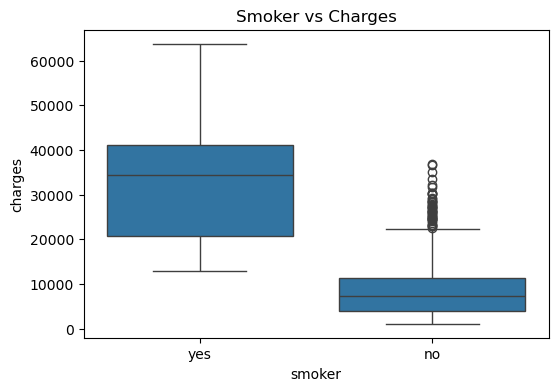

EDA Completed!



In [21]:
print("Performing EDA...\n")

# Distribution of Charges
print("Plotting Charges Distribution...")
plt.figure(figsize=(6,4))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

# Correlation Heatmap
print("Plotting Correlation Heatmap...")
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Smoker vs Charges
print("Plotting Smoker vs Charges...")
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Smoker vs Charges")
plt.show()

print("EDA Completed!\n")

In [22]:
print("Encoding Categorical Variables...\n")

df_model = df.copy()

le = LabelEncoder()

df_model['sex'] = le.fit_transform(df_model['sex'])
df_model['smoker'] = le.fit_transform(df_model['smoker'])
df_model['region'] = le.fit_transform(df_model['region'])

print("Encoding Done Successfully!\n")

print("Updated Dataset Head:")
print(df_model.head(), "\n")

Encoding Categorical Variables...

Encoding Done Successfully!

Updated Dataset Head:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520 



In [23]:
print("Splitting Features and Target...\n")

X = df_model.drop('charges', axis=1)
y = df_model['charges']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape, "\n")

Splitting Features and Target...

Features Shape: (1338, 6)
Target Shape: (1338,) 



In [24]:
print("Splitting Data into Train and Test...\n")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape, "\n")

Splitting Data into Train and Test...

Training Data Shape: (1070, 6)
Testing Data Shape: (268, 6) 



In [25]:
print("Applying Feature Scaling...\n")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling Completed Successfully!\n")


Applying Feature Scaling...

Scaling Completed Successfully!



In [26]:
print("Training Linear Regression Model...\n")

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("Linear Regression Model Trained!\n")

y_pred_lr = lr.predict(X_test_scaled)

print("Prediction Completed for Linear Regression!\n")

Training Linear Regression Model...

Linear Regression Model Trained!

Prediction Completed for Linear Regression!



In [27]:
print("Training Random Forest Model...\n")

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Model Trained!\n")

y_pred_rf = rf.predict(X_test)

print("Prediction Completed for Random Forest!\n")

Training Random Forest Model...

Random Forest Model Trained!

Prediction Completed for Random Forest!



In [28]:
print("Evaluating Models...\n")

def evaluate_model(y_test, y_pred, model_name):
    print(f"----- {model_name} Performance -----")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

print("Model Evaluation Completed!\n")

Evaluating Models...

----- Linear Regression Performance -----
MAE: 4186.508898366439
MSE: 33635210.43117845
RMSE: 5799.5870914383595
R2 Score: 0.7833463107364536


----- Random Forest Performance -----
MAE: 2501.3392865788564
MSE: 20893828.506693788
RMSE: 4570.976756306445
R2 Score: 0.8654170742271029


Model Evaluation Completed!



In [29]:
print("Checking Feature Importance...\n")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance, "\n")

Checking Feature Importance...

    Feature  Importance
4    smoker    0.609377
2       bmi    0.214834
0       age    0.134798
3  children    0.020239
5    region    0.014084
1       sex    0.006668 



In [30]:
print("Saving Model...\n")

pickle.dump(rf, open("insurance_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

print("Model Saved Successfully!\n")


Saving Model...

Model Saved Successfully!



In [31]:
print("Making Sample Prediction...\n")
import pandas as pd

sample_data = pd.DataFrame(
    [[40, 1, 30.5, 2, 1, 2]],
    columns=X.columns   # same column names used during training
)

prediction = rf.predict(sample_data)

print("Predicted Insurance Charges:", prediction[0])

Making Sample Prediction...

Predicted Insurance Charges: 40010.908068850025
